In [1]:
import numpy as np
from shapely.geometry import mapping
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

api = "6c2695a3-768a-4885-a408-5770a99f5269"

### Create catchment bounding box (for plotting on map of UK?)

In [2]:
bounds =np.array([437105.2274562499, 445746.48466874973, 426332.93763125024, 434380.81249375])
# bounds = catchment_gdf.total_bounds
from shapely.geometry import box
country_box = box(*bounds)
buffered_box = country_box.buffer(1.4)
gdf = gpd.GeoDataFrame(index=[0], crs='epsg:27700', geometry=[country_box])

In [3]:
catchment_name = 'LinDyke'
model_directory = '../../../FloodModelling/{}Models/'.format(catchment_name)

In [4]:
if catchment_name == 'LinDyke':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/CatchmentLinDyke_exported.shp'.format(catchment_name))
elif catchment_name == 'WykeBeck':
    catchment_gdf = gpd.read_file(model_directory + 'Model_IdealisedProfiles/WykeBeckCatchment.shp'.format(catchment_name))

In [5]:
ld_gdf = gpd.read_file('../../../FloodModelling/LinDykeModels/Model_IdealisedProfiles/CatchmentLinDyke_exported.shp')
wb_gdf = gpd.read_file('../../../FloodModelling/WykeBeckModels/Model_IdealisedProfiles/WykeBeckCatchment.shp')

In [6]:
watercourses = gpd.read_file('../../../FloodModelling/ExtraData/Watercourses/WatercourseLink.shp')
watercourses_clip = gpd.clip(watercourses, catchment_gdf)

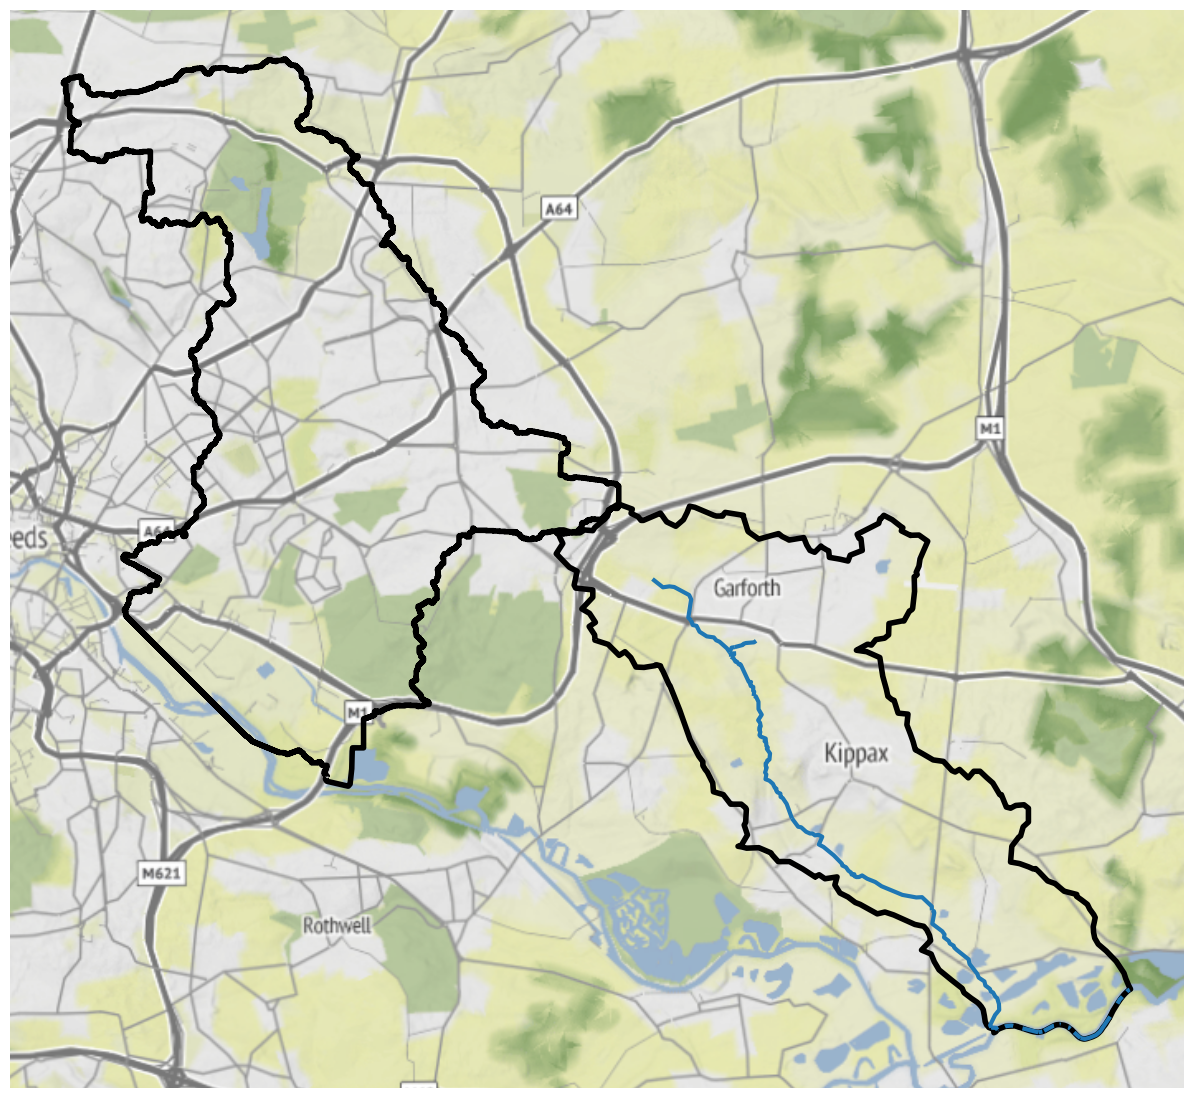

In [13]:
fig, ax = plt.subplots(figsize=(30, 14))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
# left, bottom, width, height = [0.8, 0.6, 0.2, 0.1]
# ax2 = fig.add_axes([left, bottom, width, height])

# GB_Boundary.plot(ax=ax2, facecolor="white", linewidth=2, edgecolor ='black')
# gdf.plot(ax=ax2, facecolor="none", linewidth=2, edgecolor ='red')
# ax2.axis('off');

ld_gdf.plot(ax=ax, facecolor="none", linewidth=4, edgecolor ='black')
wb_gdf.plot(ax=ax, facecolor="none", linewidth=4, edgecolor ='black')
watercourses_clip.plot(ax=ax, linewidth=3)    
cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api, 
               crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=12)

ax.axis('off');
plt.show()

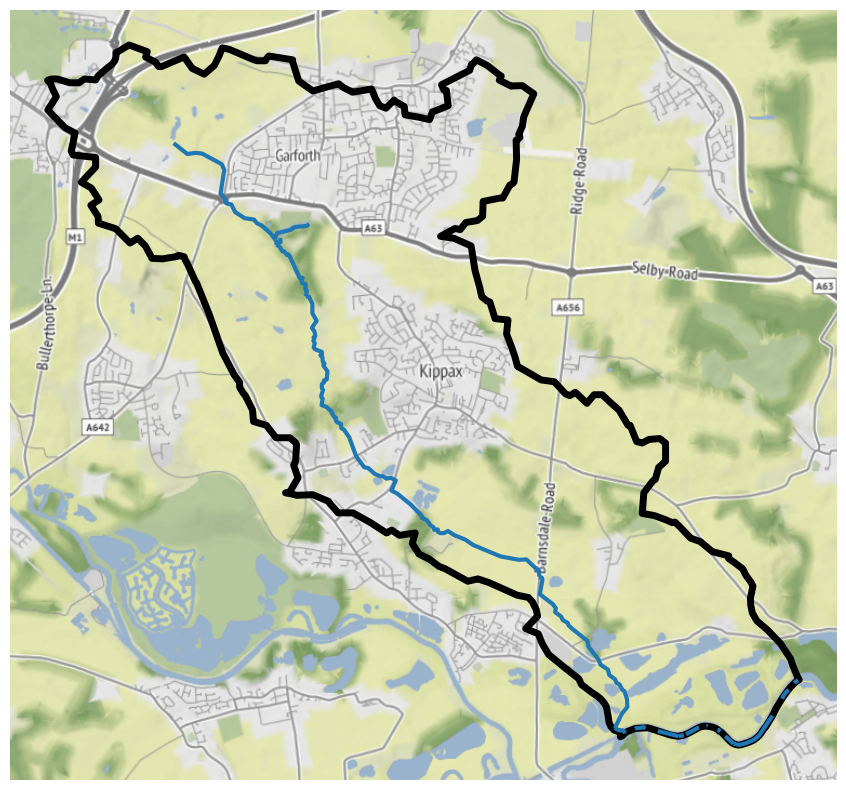

In [17]:
fig, ax = plt.subplots(figsize=(24, 10))

catchment_gdf.plot(ax=ax, facecolor="none", linewidth=5, edgecolor ='black')
watercourses_clip.plot(ax=ax, linewidth=3)    
cx.add_basemap(ax, source='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key='+api, 
               crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=13)

ax.axis('off');
plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(24, 10))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.8, 0.6, 0.2, 0.1]
ax2 = fig.add_axes([left, bottom, width, height])

GB_Boundary.plot(ax=ax2, facecolor="white", linewidth=2, edgecolor ='black')
gdf.plot(ax=ax2, facecolor="none", linewidth=2, edgecolor ='red')
ax2.axis('off');

catchment_gdf.plot(ax=ax1, facecolor="none", linewidth=5, edgecolor ='black')
watercourses_clip.plot(ax=ax1, linewidth=5)    
cx.add_basemap(ax1, crs = catchment_gdf.crs.to_string(), url = cx.providers.OpenTopoMap, zoom=13)
ax1.axis('off');
plt.show()

### Plot the bounding box of catchment on map of UK

In [8]:
GB_Boundary = gpd.read_file('../../../FloodModelling/ExtraData/GB_Boundary/infuse_uk_2011.shp')
GB_Boundary = GB_Boundary.to_crs("epsg:27700") 

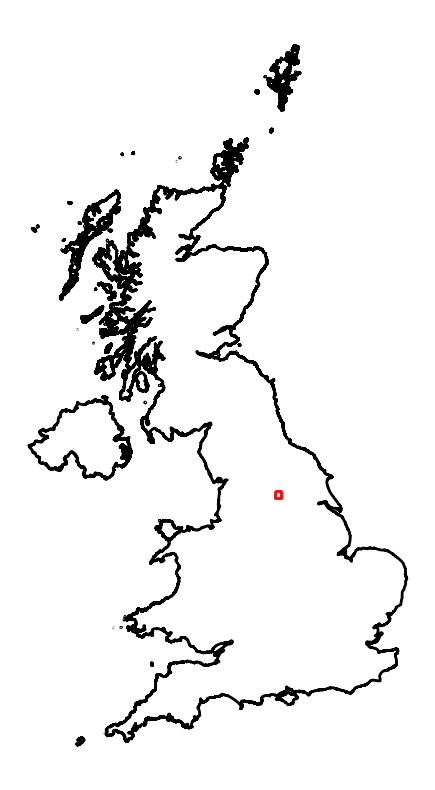

In [12]:
fig, ax = plt.subplots(figsize=(24, 10))
GB_Boundary.plot(ax=ax, facecolor="none", linewidth=2, edgecolor ='black')
gdf.plot(ax=ax, facecolor="none", linewidth=2, edgecolor ='red')
ax.axis('off');